In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
with open('data_description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
train_data['if_train'] = 1

In [5]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
data = pd.concat([train_data, test_data], ignore_index = True)

In [7]:
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,if_train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,NaN


# EDA

In [8]:
# Remove id, which is already in index
data = data.drop('Id', axis = 1)

#### Removing data with not enough data

In [9]:
# how many NAs does column have
columns_nr_nas = train_data.isnull().sum(axis = 0)
columns_fract_nas = columns_nr_nas/train_data.shape[0]
columns_fract_nas.sort_values()

Id              0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
HalfBath        0.000000
FullBath        0.000000
                  ...   
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
Length: 82, dtype: float64

In [10]:
list(columns_fract_nas[columns_fract_nas > 0.5].index)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
data = data.drop(list(columns_fract_nas[columns_fract_nas > 0.5].index), axis = 1)

#### Removing scarse data

In [12]:
# 

#### Change strings into numbers

In [13]:
# Columns with strings
data.dtypes[data.dtypes.apply(lambda x: x == np.dtype('object'))]


MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [14]:
# Check if those should be factorized
data.loc[:,data.dtypes[data.dtypes.apply(lambda x: x == np.dtype('object'))].index]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,WD,Normal
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,WD,Abnorml
2916,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,WD,Normal


In [15]:
data.dtypes[data.dtypes.apply(lambda x: x == np.dtype('object'))].index

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
labels_categories = dict()

for label in (data.dtypes[data.dtypes.apply(lambda x: x == np.dtype('object'))].index):
    labels_categories[label] = data[label].factorize()[1]
    data[label] = data[label].factorize()[0]

In [17]:
# Distributions of all the variables
data.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,if_train
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,1460.0
mean,57.137718,0.351833,69.305795,10168.114080,0.004111,0.400137,0.204522,-0.000343,0.579308,0.053786,...,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,0.248373,0.356972,180921.195890,1.0
std,42.517628,0.800460,23.344905,7886.996359,0.063996,0.570175,0.671280,0.032062,1.006727,0.248750,...,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,0.841628,0.914440,79442.502883,0.0
min,20.000000,-1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,-1.000000,0.000000,34900.000000,1.0
25%,20.000000,0.000000,59.000000,7478.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000,0.000000,129975.000000,1.0
50%,50.000000,0.000000,68.000000,9453.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.000000,163000.000000,1.0
75%,70.000000,0.000000,80.000000,11570.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,0.000000,214000.000000,1.0
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000,1.0


In [18]:
with open('data_description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [19]:
labels_categories['MSZoning'] 

Index(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype='object')

# Feature Engineering

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [21]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [22]:
# Is any data so scarce that I should remove it?
data = data.drop(['Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'RoofStyle', 'RoofMatl', 'Heating', 'CentralAir', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'Condition1', 'Condition2'], axis = 1)

In [23]:
# I have no clue what to do, needs more research or remove and see 
data = data.drop(['MSZoning', 'HouseStyle', 'Electrical'], axis = 1)

In [24]:
# Removing that just for now
data = data.drop(['MSSubClass', 'Neighborhood', 'MasVnrType'], axis = 1)

In [25]:
# enc = OneHotEncoder(handle_unknown='ignore')
# a = (data[['MSSubClass', 'Neighborhood']])
# enc.fit(a)
# enc.categories_
# 
# # Which categorical should be one-hot encoded
# enc.transform(data[['MSSubClass', 'Neighborhood']]).toarray()

In [26]:
# Which data should stay encoded
data[['ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu']]

,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
0,0,0,0,0,0,0,-1
1,0,0,0,1,1,1,0
2,0,0,0,2,0,0,0
3,0,1,1,0,1,0,1
4,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...
2914,0,1,0,0,2,1,-1
2915,0,1,0,0,3,1,-1
2916,0,1,0,0,1,1,0
2917,0,0,0,3,0,1,-1


In [27]:
data = data.drop(['BldgType', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF1', 'HeatingQC', '2ndFlrSF', 'TotalBsmtSF', 'LowQualFinSF', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition'], axis = 1)

In [28]:
data

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice,if_train
0,65.0,8450,0,7,5,2003,2003,196.0,0.0,150.0,...,3,0,8,0,548.0,0,2,2008,208500.0,1.0
1,80.0,9600,0,6,8,1976,1976,0.0,0.0,284.0,...,3,1,6,1,460.0,298,5,2007,181500.0,1.0
2,68.0,11250,1,7,5,2001,2002,162.0,0.0,434.0,...,3,0,6,1,608.0,0,9,2008,223500.0,1.0
3,60.0,9550,1,7,5,1915,1970,0.0,0.0,540.0,...,3,0,7,1,642.0,0,2,2006,140000.0,1.0
4,84.0,14260,1,8,5,2000,2000,350.0,0.0,490.0,...,4,0,9,1,836.0,192,12,2008,250000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,0,4,7,1970,1970,0.0,0.0,546.0,...,3,1,5,0,0.0,0,6,2006,NaN,NaN
2915,21.0,1894,0,4,5,1970,1970,0.0,0.0,294.0,...,3,1,6,0,286.0,0,4,2006,NaN,NaN
2916,160.0,20000,0,5,7,1960,1996,0.0,0.0,0.0,...,4,1,7,1,576.0,474,9,2006,NaN,NaN
2917,62.0,10441,0,5,5,1992,1992,0.0,0.0,575.0,...,3,1,6,0,0.0,80,7,2006,NaN,NaN


In [29]:
data = data.drop('BsmtFinSF2', axis = 1)

In [30]:
data = data.drop('LotFrontage', axis = 1)

In [31]:
data = data.drop('MasVnrArea', axis = 1)

In [32]:
data.LotShape = data.LotShape.replace([2,3], 1)
data.BsmtFullBath = data.BsmtFullBath.replace([2,3], 1)
data.Fireplaces = data.Fireplaces.replace([2,3,4], 1)
data.HalfBath = data.HalfBath.replace(2, 1)


In [33]:
data = data[~((data.loc[:,'LotArea'] > 30000) & (data.loc[:,'if_train'] == 1))]


In [34]:
# Are there any variables which are correlated? correlation/covariance matrix

In [35]:
# Does test data have categories that do not appear in train? 

In [36]:
# Can I apply decomposition? If so, which?

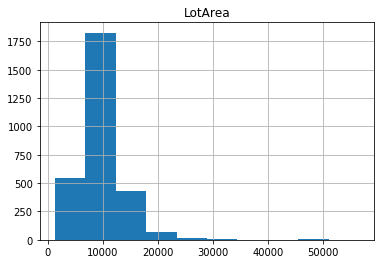

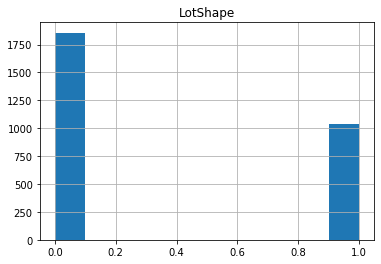

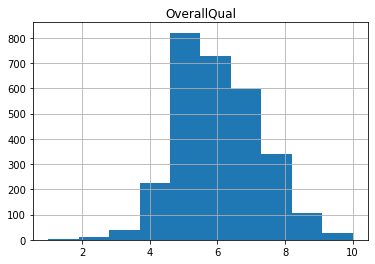

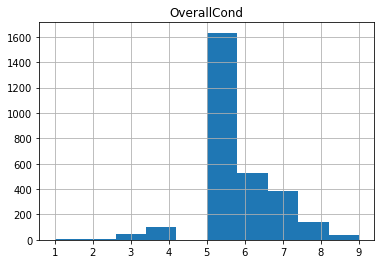

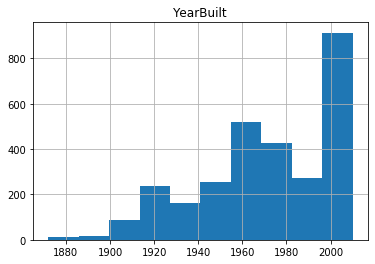

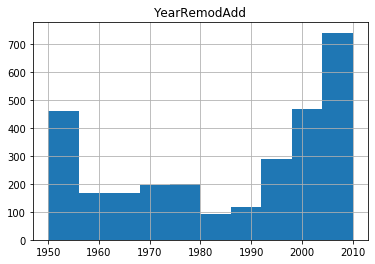

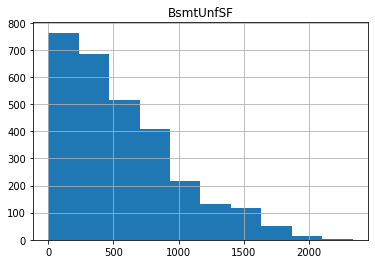

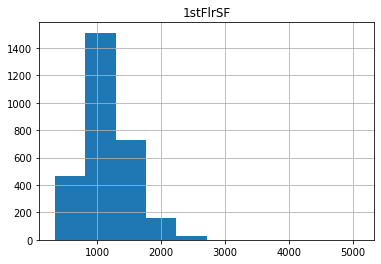

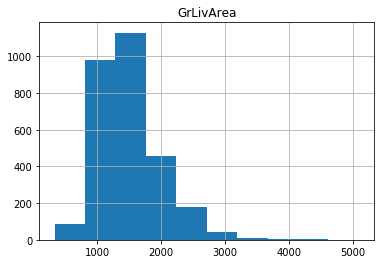

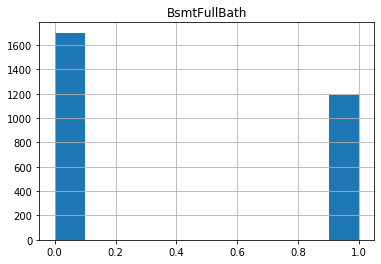

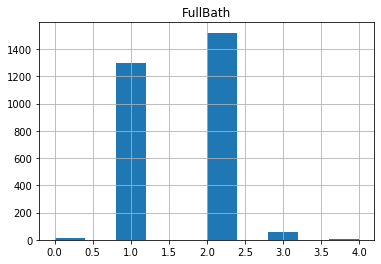

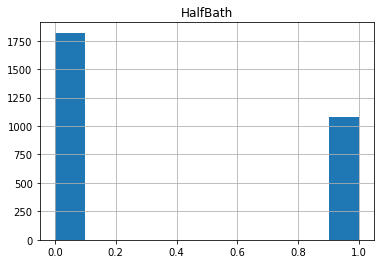

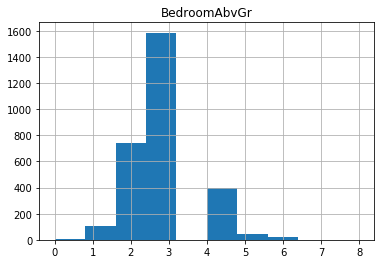

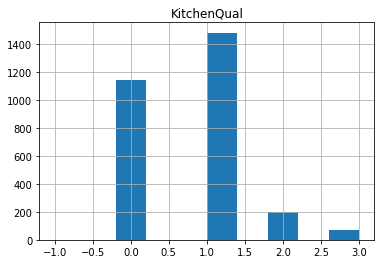

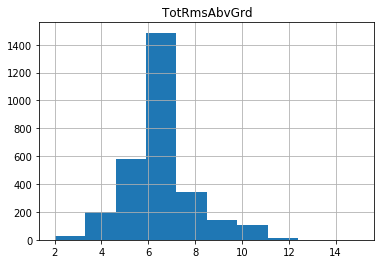

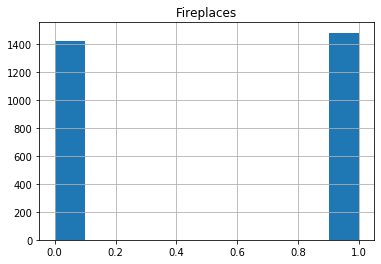

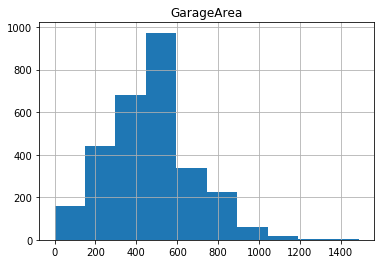

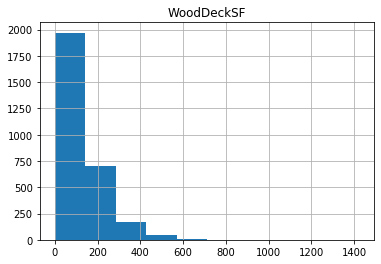

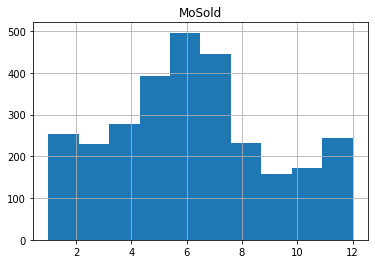

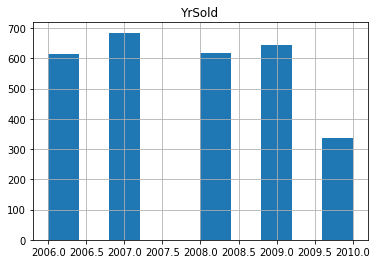

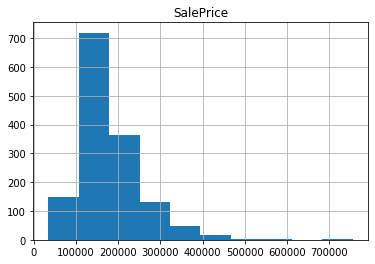

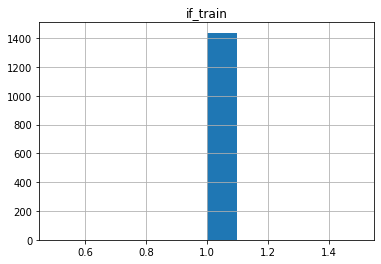

In [37]:
# What should I do with NAs?
for column in data.columns:
    data.loc[:,column].hist()
    plt.title(column)
    plt.show()

In [38]:
data

,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice,if_train
0,8450,0,7,5,2003,2003,150.0,856,1710,1.0,...,3,0,8,0,548.0,0,2,2008,208500.0,1.0
1,9600,0,6,8,1976,1976,284.0,1262,1262,0.0,...,3,1,6,1,460.0,298,5,2007,181500.0,1.0
2,11250,1,7,5,2001,2002,434.0,920,1786,1.0,...,3,0,6,1,608.0,0,9,2008,223500.0,1.0
3,9550,1,7,5,1915,1970,540.0,961,1717,1.0,...,3,0,7,1,642.0,0,2,2006,140000.0,1.0
4,14260,1,8,5,2000,2000,490.0,1145,2198,1.0,...,4,0,9,1,836.0,192,12,2008,250000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1936,0,4,7,1970,1970,546.0,546,1092,0.0,...,3,1,5,0,0.0,0,6,2006,NaN,NaN
2915,1894,0,4,5,1970,1970,294.0,546,1092,0.0,...,3,1,6,0,286.0,0,4,2006,NaN,NaN
2916,20000,0,5,7,1960,1996,0.0,1224,1224,1.0,...,4,1,7,1,576.0,474,9,2006,NaN,NaN
2917,10441,0,5,5,1992,1992,575.0,970,970,0.0,...,3,1,6,0,0.0,80,7,2006,NaN,NaN


In [39]:
# Continous variables
con_variables = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'YrSold']

In [40]:
# Continous variables
con_train_data = data[data['if_train'] == 1][con_variables]
con_data = data[con_variables]

In [41]:
# Scaling continous variables
scaler = StandardScaler().fit(con_train_data)
con_transf_data = scaler.transform(con_data)
# con_transf_test_data = scaler.transform(con_test_data)

In [42]:
other_data = data.loc[:,(~data.columns.isin(con_variables)) & (~data.columns.isin(['SalePrice']))]
other_data = other_data.reset_index()

In [43]:
final_data = pd.DataFrame(con_transf_data, columns = con_variables)


In [44]:
x = pd.concat([final_data, other_data], axis = 1)

In [87]:
x = x.drop('index', axis = 1)

In [88]:
x_train = x[x.if_train == 1].loc[:,(~x.columns.isin(['if_train']))]
x_valid = x[x.if_train != 1].loc[:,(~x.columns.isin(['if_train']))]


In [89]:
y = data['SalePrice'].reset_index()['SalePrice']

In [90]:
y_train = y[~y.isna()]
y_valid = y[y.isna()]


## Subsets of Train Dataset

In [ ]:
# Evaluate methods on subset of train data after CV


### Missing NAs in Validation set

In [115]:
x_valid[x_valid.isna().sum(axis = 1) != 0]

,LotArea,YearBuilt,YearRemodAdd,BsmtUnfSF,1stFlrSF,GrLivArea,GarageArea,WoodDeckSF,YrSold,LotShape,OverallQual,OverallCond,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,MoSold
2098,-0.955960,-0.834847,-1.688167,NaN,-0.695594,-1.208304,-0.899910,-0.756153,0.136178,1,4,7,NaN,1,0,2,1,4,0,4
2166,9.603011,-0.405681,0.538353,-1.286209,7.240300,4.602943,0.731407,-0.756153,0.136178,1,5,7,NaN,3,1,5,2,11,1,7
2554,-0.153759,-1.594142,0.683560,-0.584058,-0.570748,0.643981,NaN,0.681537,-0.616989,0,5,6,0.0,2,0,3,0,6,0,3


# Diagnostic of models

In [48]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import SCORERS

In [49]:
# X_train, X_test, y_train, y_test = train_test_split(x[x['if_train' == 1]],
#                                                     y,
#                                                     test_size=0.4,
#                                                     random_state=0)

### Random Forest 

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
# Set the parameters by cross-validation
grid_param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4,6,8],
    'min_samples_split': [3, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

scores_classification = ['accuracy', 'precision', 'recall', 'f1_score']
scores_regression = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']

In [93]:
regressor_rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator=regressor_rf,
                              param_grid=grid_param_rf,
                              scoring=scores_regression[3],
                              cv=5,
                              n_jobs=-1)

In [94]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [95]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [96]:
# grid_search_rf.cv_results_.keys()
# grid_search_rf.scorer_
# plt.hist(grid_search_rf.cv_results_['mean_test_score'])
# plt.hist(grid_search_rf.cv_results_['std_test_score'])


In [97]:
best_param_rf = grid_search_rf.best_params_
print(best_param_rf)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 200}


In [98]:
# # Apply this only if the manually chosen parameters work
# from sklearn.model_selection import ParameterGrid
# from sklearn.metrics import fbeta_score, make_scorer
# ftwo_scorer = make_scorer(fbeta_score, beta=2)
# print('ftwo_scorer is: ', ftwo_scorer)
# 
# param_grid = {'a': [1, 2], 'b': [True, False]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, param_grid, scoring=ftwo_scorer)
# clf.fit(iris.data, iris.target)


In [99]:
# create regressor object 
regressor_rf = RandomForestRegressor(**best_param_rf) 

# fit the regressor with x and y data 
regressor_rf.fit(x_train,
                 y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [100]:
x_train.columns

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', '1stFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'YrSold', 'LotShape',
       'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'MoSold'],
      dtype='object')

In [101]:
# Importance of each feature used
importance_features = list(enumerate(regressor_rf.feature_importances_))
for i in sorted(importance_features, key=lambda x:x[1]):
    print(x_train.columns[i[0]], i[1])

YrSold 0.002863805845664407
LotShape 0.002887269709422837
MoSold 0.007018655216604715
BsmtFullBath 0.007027810519489956
BedroomAbvGr 0.007874991430921565
HalfBath 0.007894140197290813
OverallCond 0.009724058844084858
BsmtUnfSF 0.01126456269555824
WoodDeckSF 0.012372384951602408
Fireplaces 0.03224912646034402
LotArea 0.03610097000454173
TotRmsAbvGrd 0.04252389255858175
YearRemodAdd 0.04285816893425956
KitchenQual 0.04303978761796005
FullBath 0.048087951249534286
GarageArea 0.10470536117151369
1stFlrSF 0.10986786588715457
YearBuilt 0.11753426921888795
GrLivArea 0.15176833270941495
OverallQual 0.2023365947771677


In [73]:
# print(scores)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [106]:
regressor_rf.predict(x_valid)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# Finished Model